In [1]:
import tensorflow as tf
import os
from keras.models import load_model
file_path = 'F:\DL Projects\ImageClassification\models\imageclassifier.h5'
if os.path.exists(file_path):
    new_model = load_model(file_path)
    print("Model loaded successfully.")
else:
    print(f"File not found at path: {file_path}")

Model loaded successfully.


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

C:\Users\DELL\AppData\Local\Temp\ipykernel_3136\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

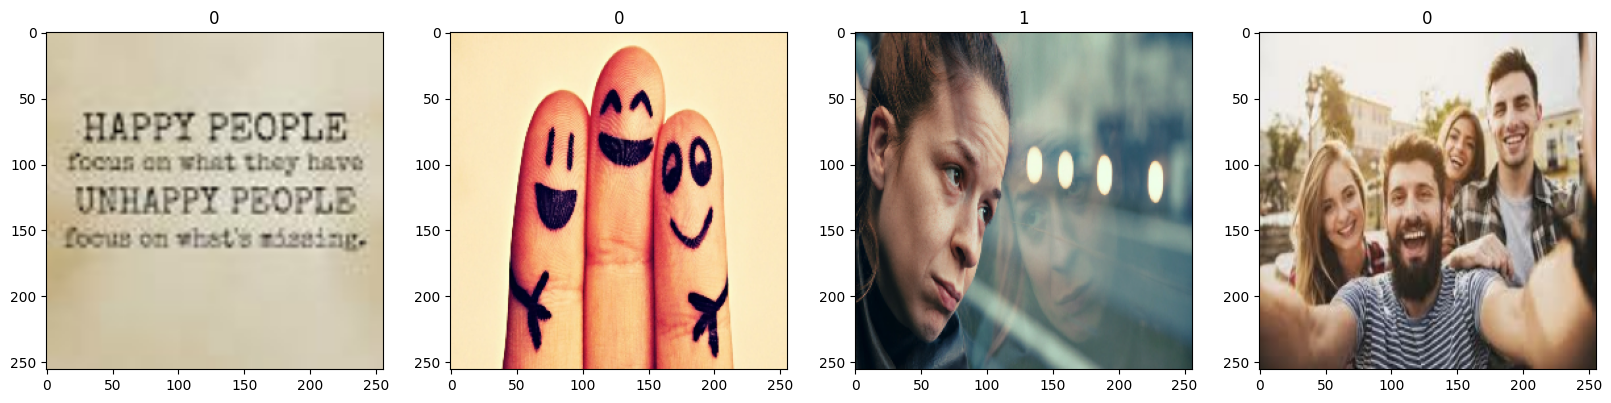

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.96862745, 0.94509804, 0.8980392 ],
          [0.96862745, 0.94509804, 0.8980392 ],
          [0.96862745, 0.94509804, 0.8980392 ],
          ...,
          [0.277091  , 0.2100337 , 0.18713236],
          [0.22161458, 0.17452513, 0.15198377],
          [0.19413297, 0.15818015, 0.13824296]],
 
         [[0.96862745, 0.94509804, 0.8980392 ],
          [0.96862745, 0.94509804, 0.8980392 ],
          [0.96862745, 0.94509804, 0.8980392 ],
          ...,
          [0.25520954, 0.18894988, 0.16684619],
          [0.20451899, 0.15742953, 0.13488817],
          [0.17703737, 0.14456452, 0.12288734]],
 
         [[0.96862745, 0.94509804, 0.8980392 ],
          [0.96862745, 0.94509804, 0.8980392 ],
          [0.96862745, 0.94509804, 0.8980392 ],
          ...,
          [0.22597189, 0.16166429, 0.13985823],
          [0.18328522, 0.1372987 , 0.11503092],
          [0.15709181, 0.1279109 , 0.10594327]],
 
         ...,
 
         [[0.6844954 , 0.7753961 , 0.72756374],
          [0.69543

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 45s 5s/step - loss: 0.8276 - accuracy: 0.4688 - val_loss: 0.6577 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 25s 3s/step - loss: 0.6563 - accuracy: 0.5804 - val_loss: 0.6285 - val_accuracy: 0.5781
Epoch 3/20
7/7 [==============================] - 23s 3s/step - loss: 0.5898 - accuracy: 0.6830 - val_loss: 0.5247 - val_accuracy: 0.6875
Epoch 4/20
7/7 [==============================] - 22s 3s/step - loss: 0.5011 - accuracy: 0.7679 - val_loss: 0.4344 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 22s 3s/step - loss: 0.4319 - accuracy: 0.7768 - val_loss: 0.3357 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 24s 3s/step - loss: 0.4337 - accuracy: 0.8304 - val_loss: 0.3959 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 23s 3s/step - loss: 0.3152 - accuracy: 0.8839 - val_loss: 0.2080 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================

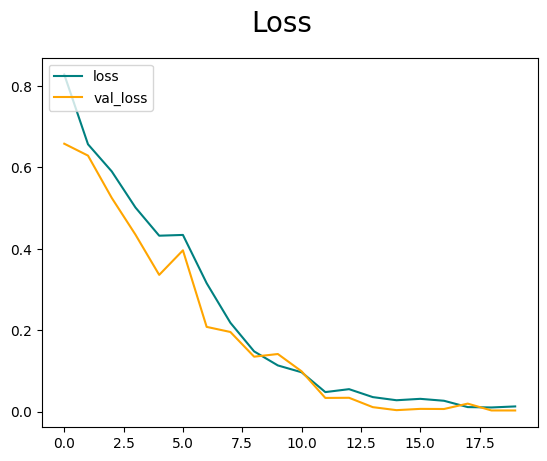

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

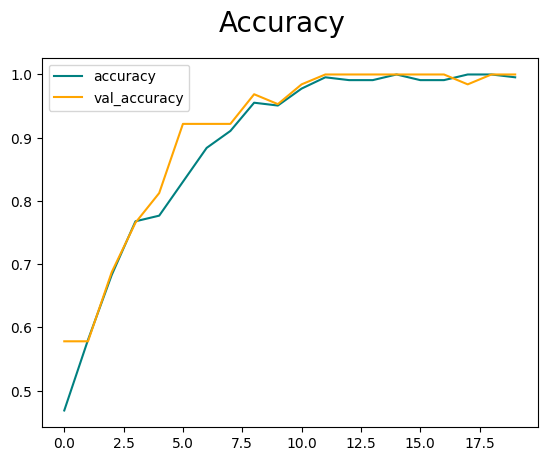

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 868ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [34]:
import cv2

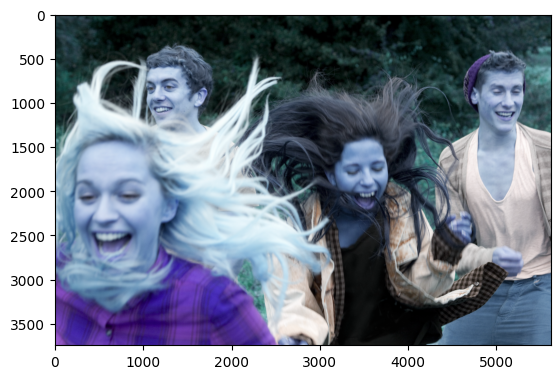

In [35]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

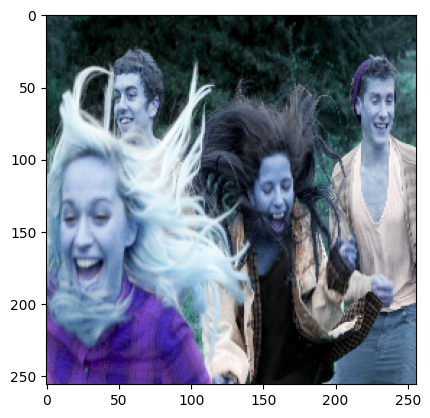

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 96ms/step


In [38]:
yhat

array([[0.06630936]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [40]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('new_model = load_model(/models/imageclassifier.h5)'))

INFO:tensorflow:Assets written to: new_model = load_model(/models/imageclassifier.h5)\assets


INFO:tensorflow:Assets written to: new_model = load_model(/models/imageclassifier.h5)\assets


In [49]:
new_model = load_model('models/imageclassifier.h5')

In [50]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 4s 4s/step


array([[0.06630936]], dtype=float32)